## Anime Recommendation System 

A recommendation system is a subclass of information filtering system. In this project we attempt to predict the "rating" or "preference" that the user would give the item or in this case the anime. 

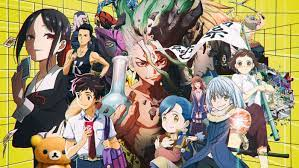

The dataset was collected from Kaggle, we collected anime details, profile information and rating information. We chose features such as Title​, Type​, Source​, Episodes​, Score​, Rank​, Popularity​, Genre​ and Rating. In this project we specifically explore non-probabilistic collabrative filtering algorithms such as:

- User based filtering 
- Item based filtering 
- Rating based filtering 
- Content based filtering

In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The absolute path of the current directory
abspath = '/content/drive/My Drive/Colab Notebooks/'

#### Cleaning the dataset


In [ ]:
 anime_cleaned=pd.read_csv(abspath +"anime_cleaned.csv")

In [ ]:
anime_cleaned

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,True,"May 25, 2018 to ?","{'from': '2018-05-25', 'to': None}",30 min.,Rx - Hentai,9.52,33,NaN,10273,357,21,NaN,NaN,NaN,[],NaN,NaN,Collaboration Works,Hentai,[],[],30.0,2018.0
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,False,"May 25, 2018","{'from': '2018-05

In [ ]:
animes=pd.read_csv(abspath +"animes.csv")
profiles=pd.read_csv(abspath +"profiles.csv")

In [ ]:
#subset anime cleaned and then clean the text data
anime_att1=anime_cleaned[['anime_id','title','type','source','episodes','score','rank','popularity','genre','members']]
anime_att2=animes[['uid','title','synopsis']]

In [ ]:
#convert source to lower case
anime_att1['source']=anime_att1['source'].str.lower()
anime_att1['title']=anime_att1['title'].str.lower()
anime_att1['genre']=anime_att1['genre'].str.lower()
anime_att1=anime_att1.rename(columns={"title_english": "title"})

In [ ]:
anime_att2['title']=anime_att2['title'].str.lower()
anime_att2['synopsis']=anime_att2['synopsis'].str.lower()

In [ ]:
#perform join on the basis of title 
anime_final=pd.merge(anime_att1,anime_att2,on='title')

In [ ]:
anime_final=anime_final.drop_duplicates(subset=['title'])

In [ ]:
new_pro=profiles.drop(['link','birthday','gender'],axis=1)

In [ ]:
new_pro['profile']=new_pro['profile'].str.lower()

#### Item Based Collabrative FIltering


In [ ]:
# only select tv show and movie
print(anime_final.shape)
anime = anime_final[(anime_final['type'] == 'TV') | (anime_final['type'] == 'Movie')]
print(anime.shape)

(6281, 12)
(3706, 12)


In [ ]:
# only select famous anime, 75% percentile
m = anime['members'].quantile(0.75)
anime = anime[(anime['members'] >= m)]
anime.shape

(927, 12)

In [ ]:
rating.loc[rating.rating == -1, 'rating'] = np.NaN
rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [ ]:
anime_index = pd.Series(anime.index, index=anime.title)
anime_index.head()

title
inu x boku ss                     0
seto no hanayome                  1
princess tutu                     4
bakuman. 3rd season               6
shakugan no shana ii (second)    11
dtype: int64

In [ ]:
joined = anime.merge(rating, how='inner', on='anime_id')
joined.head()

,anime_id,title,type,source,episodes,score,rank,popularity,genre,members,uid,synopsis,user_id,rating
0,11013,inu x boku ss,TV,manga,12,7.63,1274.0,231,"comedy, supernatural, romance, shounen",283882,11013,ririchiyo shirakiin is the sheltered daughter ...,5,1.0
1,11013,inu x boku ss,TV,manga,12,7.63,1274.0,231,"comedy, supernatural, romance, shounen",283882,11013,ririchiyo shirakiin is the sheltered daughter ...,41,9.0
2,11013,inu x boku ss,TV,manga,12,7.63,1274.0,231,"comedy, supernatural, romance, shounen",283882,11013,ririchiyo shirakiin is the sheltered daughter ...,46,10.0
3,11013,inu x boku ss,TV,manga,12,7.63,1274.0,231,"comedy, supernatural, romance, shounen",283882,11013,ririchiyo shirakiin is the sheltered daughter ...,54,NaN
4,11013,inu x boku ss,TV,manga,12,7.63,1274.0,231,"comedy, supernatural, romance, shounen",283882,11013,ririchiyo shirakiin is the sheltered daughter ...,62,7.0


In [ ]:
joined = joined[['user_id', 'title', 'rating']]

pivot = pd.pivot_table(joined, index='title', columns='user_id', values='rating')
pivot.head()

user_id,1,2,3,5,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,...,73476,73478,73479,73480,73481,73482,73483,73484,73485,73486,73487,73488,73489,73490,73491,73492,73493,73494,73495,73496,73497,73498,73499,73500,73501,73502,73503,73504,73505,73506,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
.hack//sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-ghost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa! megami-sama! (tv),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot.dropna(axis=1, how='all', inplace=True)
pivot.head()

user_id,1,2,3,5,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,...,73476,73478,73479,73480,73481,73482,73483,73484,73485,73486,73487,73488,73489,73490,73491,73492,73493,73494,73495,73496,73497,73498,73499,73500,73501,73502,73503,73504,73505,73506,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
.hack//sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-ghost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,6.0,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa! megami-sama! (tv),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_norm = pivot.apply(lambda x: x - np.nanmean(x), axis=1)
pivot_norm.head()

user_id,1,2,3,5,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,...,73476,73478,73479,73480,73481,73482,73483,73484,73485,73486,73487,73488,73489,73490,73491,73492,73493,73494,73495,73496,73497,73498,73499,73500,73501,73502,73503,73504,73505,73506,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
.hack//sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.637363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-ghost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.616920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.275964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.724036,NaN,NaN,-0.724036,NaN,2.275964,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.724036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006489,NaN,NaN,NaN,NaN,-0.993511,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.006489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa! megami-sama! (tv),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.642276,NaN,NaN,NaN,0.357724,NaN,NaN,1.357724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# fill NaN with 0
pivot_norm.fillna(0, inplace=True)
pivot_norm.head()

user_id,1,2,3,5,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,...,73476,73478,73479,73480,73481,73482,73483,73484,73485,73486,73487,73488,73489,73490,73491,73492,73493,73494,73495,73496,73497,73498,73499,73500,73501,73502,73503,73504,73505,73506,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
.hack//sign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.637363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-ghost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.616920,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.38308,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11eyes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.275964,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.724036,0.0,0.0,-0.724036,0.0,2.275964,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,-3.724036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006489,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006489,0.0,0.0,0.000000,0.0,-0.993511,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,1.006489,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aa! megami-sama! (tv),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.642276,0.0,0.0,0.0,0.357724,0.00000,0.0,1.357724,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# convert into dataframe to make it easier
item_sim_df = pd.DataFrame(cosine_similarity(pivot_norm, pivot_norm), index=pivot_norm.index, columns=pivot_norm.index)
item_sim_df.head()

title,.hack//sign,07-ghost,11eyes,91 days,aa! megami-sama! (tv),absolute duo,accel world,acchi kocchi (tv),afro samurai,air,air gear,ajin,akagami no shirayuki-hime,akagami no shirayuki-hime 2nd season,akame ga kill!,akaneiro ni somaru saka,akatsuki no yona,akikan!,akira,aku no hana,akuma no riddle,aldnoah.zero,aldnoah.zero 2nd season,amaama to inazuma,amagami ss,amagami ss+ plus,amagi brilliant park,amnesia,angel beats!,ano hi mita hana no namae wo bokutachi wa mada shiranai.,ano hi mita hana no namae wo bokutachi wa mada shiranai. movie,ano natsu de matteru,another,ansatsu kyoushitsu,ansatsu kyoushitsu 2nd season,ao haru ride,ao no exorcist,ao no exorcist movie,ao no kanata no four rhythm,aoharu x kikanjuu,...,uta no☆prince-sama♪ maji love 1000%,utawarerumono,vampire hunter d (2000),vampire knight,vampire knight: guilty,watashi ga motenai no wa dou kangaetemo omaera ga warui!,white album 2,witch craft works,working!!,working!!!,world trigger,xxxholic,xxxholic kei,yahari ore no seishun love comedy wa machigatteiru.,yahari ore no seishun love comedy wa machigatteiru. zoku,yamada-kun to 7-nin no majo (tv),yamato nadeshiko shichihenge♥,yojouhan shinwa taikei,"yosuga no sora: in solitude, where we are least alone.",yowamushi pedal,yozakura quartet,yumekui merry,yuru yuri,yuru yuri♪♪,yuuki yuuna wa yuusha de aru,yuusha ni narenakatta ore wa shibushibu shuushoku wo ketsui shimashita.,yuu☆yuu☆hakusho,yu☆gi☆oh!,yu☆gi☆oh! duel monsters,yu☆gi☆oh!: duel monsters gx,zankyou no terror,zero no tsukaima,zero no tsukaima f,zero no tsukaima: futatsuki no kishi,zero no tsukaima: princesses no rondo,zetman,zetsuen no tempest,zettai karen children: the unlimited - hyoubu kyousuke,zoku natsume yuujinchou,zombie-loan
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
.hack//sign,1.000000,0.058850,0.050163,0.014148,0.072074,0.020943,0.055508,0.029340,0.046662,0.063442,0.062384,0.015441,0.020660,0.019870,0.025484,0.046099,0.022771,0.041415,0.048243,0.021470,0.024812,0.022628,0.031946,0.016480,0.041013,0.039715,0.022908,0.024949,0.050996,0.046631,0.022445,0.040103,0.043155,0.034004,0.030447,0.021077,0.049767,0.021046,0.016230,0.008905,...,0.014338,0.049961,0.035699,0.050990,0.041713,0.036757,0.022114,0.027049,0.048846,0.024509,0.017973,0.055709,0.031301,0.028562,0.021497,0.026343,0.028756,0.033545,0.037005,0.021799,0.053048,0.050968,0.024920,0.017930,0.012698,0.032608,0.053276,0.039986,0.052256,0.017571,0.024561,0.047560,0.039092,0.052149,0.045486,0.016037,0.027999,0.016619,0.038653,0.056693
07-ghost,0.058850,1.000000,0.122489,0.021060,0.050857,0.034925,0.063715,0.051578,0.026919,0.051496,0.089277,0.034800,0.048358,0.039790,0.040192,0.074069,0.066317,0.078671,0.013415,0.008648,0.043075,0.034733,0.040537,0.028414,0.057548,0.047326,0.044481,0.071749,0.065573,0.055684,0.011089,0.044701,0.074777,0.058213,0.048287,0.055388,0.133957,0.058440,0.018745,0.055722,...,0.083701,0.031106,0.022799,0.137308,0.133530,0.029860,0.027104,0.043247,0.062724,0.024462,0.037020,0.054222,0.066368,0.044818,0.031385,0.029473,0.057108,0.021601,0.041339,0.050292,0.078780,0.065824,0.033099,0.026120,0.036562,0.038202,0.033050,0.035958,0.038062,0.042205,0.047699,0.076873,0.069157,0.078587,0.076073,0.066610,0.071991,0.057657,0.094213,0.129566
11eyes,0.050163,0.122489,1.000000,0.030088,0.051948,0.106376,0.108993,0.072032,0.038066,0.059143,0.094694,0.036814,0.030892,0.027982,0.081055,0.150573,0.051934,0.132615,0.017590,0.021080,0.077978,0.063085,0.061310,0.031237,0.105293,0.082775,0.060329,0.080110,0.097651,0.059212,0.027293,0.092687,0.111305,0.056491,0.046691,0.053572,0.111302,0.065019,0.038806,0.032218,...,0.059127,0.039257,0.027959,0.086053,0.086637,0.051410,0.041070,0.087439,0.075175,0.046998,0.021805,0.031496,0.035495,0.068569,0.041104,0.073140,0.028841,0.014071,0.112838,0.032452,0.088912,0.109445,0.047053,0.042523,0.038472,0.091302,0.039865,0.040280,0.042636,0.052891,0.048070,0.128900,0.130139,0.127209,0.138546,0.080398,0.077581,0.065514,0.0161

In [ ]:
def get_similar_anime(anime_name):
    if anime_name not in pivot_norm.index:
        return None, None
    else:
        sim_animes = item_sim_df.sort_values(by=anime_name, ascending=False).index[1:]
        sim_score = item_sim_df.sort_values(by=anime_name, ascending=False).loc[:, anime_name].tolist()[1:]
        return sim_animes, sim_score

In [ ]:
animes, score = get_similar_anime("91 days")
#print(animes,score)
for x,y in zip(animes[:10], score[:10]):
    print("{} with similarity of {}".format(x, y))

bungou stray dogs with similarity of 0.15708908347840497
joker game with similarity of 0.1563716484311418
orange with similarity of 0.14811754532540702
mob psycho 100 with similarity of 0.14265746060754592
shokugeki no souma: ni no sara with similarity of 0.14177582099787236
koutetsujou no kabaneri with similarity of 0.13846704102797103
boku dake ga inai machi with similarity of 0.13670446386968285
nejimaki seirei senki: tenkyou no alderamin with similarity of 0.13546698900706453
dimension w with similarity of 0.13473643529179757
kiznaiver with similarity of 0.13415920204143164


In [ ]:
# predict the rating of anime x by user y
def predict_rating(user_id, anime_name, max_neighbor=10):
    animes, scores = get_similar_anime(anime_name)
    anime_arr = np.array([x for x in animes])
    sim_arr = np.array([x for x in scores])
    
    # select only the anime that has already rated by user x
    filtering = pivot_norm[user_id].loc[anime_arr] != 0
    
    # calculate the predicted score
    s = np.dot(sim_arr[filtering][:max_neighbor], pivot[user_id].loc[anime_arr[filtering][:max_neighbor]]) \
            / np.sum(sim_arr[filtering][:max_neighbor])
    
    return s

In [ ]:
# recommend top n_anime for user x based on item collaborative filtering algorithm
def get_recommendation(user_id, n_anime=10):
    predicted_rating = np.array([])
    
    for _anime in pivot_norm.index:
        predicted_rating = np.append(predicted_rating, predict_rating(user_id, _anime))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.index})
    filtering = (pivot_norm[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return anime.loc[anime_index.loc[temp.name[:n_anime]]]

In [ ]:
get_recommendation(3)

,anime_id,title,type,source,episodes,score,rank,popularity,genre,members,uid,synopsis
7308,5258,hajime no ippo: new challenger,TV,manga,26,8.73,42.0,663,"comedy, sports, drama, shounen",126037,5258,japanese featherweight champion ippo makunouch...
296,11061,hunter x hunter (2011),TV,manga,148,9.11,8.0,35,"action, adventure, super power, shounen",720920,11061,hunter x hunter is set in a world where hunte...
5359,19647,hajime no ippo: rising,TV,manga,25,8.66,55.0,845,"comedy, sports, drama, shounen",102952,19647,japanese featherweight champion makunouchi ipp...
3645,918,gintama,TV,manga,201,9.01,15.0,95,"action, sci-fi, comedy, historical, parody, sa...",459031,918,"the amanto, aliens from outer space, have inva..."
7099,263,hajime no ippo,TV,manga,75,8.80,28.0,313,"comedy, sports, drama, shounen",229504,263,makunouchi ippo has been bullied his entire li...
6,12365,bakuman. 3rd season,TV,manga,25,8.67,50.0,426,"comedy, drama, romance, shounen",182765,12365,"onto their third serialization, manga duo mori..."
6196,18179,yowamushi pedal,TV,manga,38,8.11,430.0,670,"comedy, sports, drama, shounen",125149,18179,sakamichi onoda is a cheerful otaku looking to...
767,28977,gintama°,TV,manga,51,9.15,3.0,383,"action, comedy, historical, parody, samurai, s...",198744,28977,"gintoki, shinpachi, and kagura return as the f..."
34,10030,bakuman. 2nd season,TV,manga,25,8.49,108.0,374,"comedy, drama, romance, shounen",201720,10030,"with the serialization of their new manga, ""de..."
2656,18689,diamond no ace,TV,manga,75,8.20,312.0,787,"comedy, school, shounen, sports",109692,18689,with a stray pitch that completely missed the ...


#### Content Based Filtering

In [ ]:
anime_cont=anime_final.copy()

In [ ]:
anime_cont.isnull().sum()

anime_id        0
title           0
type            0
source          0
episodes        0
score           0
rank          350
popularity      0
genre           3
members         0
uid             0
synopsis       95
dtype: int64

In [ ]:
anime_cont=anime_cont.drop(['rank','synopsis'],axis=1)

In [ ]:
anime_cont['genre'].fillna('Unknown', inplace=True)
anime_cont.isnull().any()

anime_id      False
title         False
type          False
source        False
episodes      False
score         False
popularity    False
genre         False
members       False
uid           False
dtype: bool

In [ ]:
m = anime_cont.members.quantile(0.75)
C = anime_cont.score.mean()
print(m, C)

43883.0 6.839888552778236


In [ ]:
def weighted_rating(df, m, C):
    term = df['members'] / (m + df['members'])
    return df['score'] * term + (1-term) * C

In [ ]:
anime_cont['community_rating'] = anime_cont.apply(weighted_rating, axis=1, args=(m,C))
anime_cont.head()

,anime_id,title,type,source,episodes,score,popularity,genre,members,uid,community_rating
0,11013,inu x boku ss,TV,manga,12,7.63,231,"comedy, supernatural, romance, shounen",283882,11013,7.524215
1,2104,seto no hanayome,TV,manga,26,7.89,366,"comedy, parody, romance, school, shounen",204003,2104,7.704100
3,5262,shugo chara!! doki,TV,manga,51,7.55,1173,"comedy, magic, school, shoujo",70127,5262,7.276675
4,721,princess tutu,TV,original,38,8.21,916,"comedy, drama, magic, romance, fantasy",93312,721,7.771758
6,12365,bakuman. 3rd season,TV,manga,25,8.67,426,"comedy, drama, romance, shounen",182765,12365,8.315659


In [ ]:
anime_cont.drop(['anime_id', 'source','score', 'popularity','members', 'episodes','uid'], axis=1, inplace=True)
anime_cont.head()

,title,type,genre,community_rating
0,inu x boku ss,TV,"comedy, supernatural, romance, shounen",7.524215
1,seto no hanayome,TV,"comedy, parody, romance, school, shounen",7.704100
3,shugo chara!! doki,TV,"comedy, magic, school, shoujo",7.276675
4,princess tutu,TV,"comedy, drama, magic, romance, fantasy",7.771758
6,bakuman. 3rd season,TV,"comedy, drama, romance, shounen",8.315659


In [ ]:
#split the genres
content_df=pd.concat([anime_cont,anime_cont['type'].str.get_dummies(),anime_final['genre'].str.get_dummies(sep=',')],axis=1)
content_df.head()

,title,type,genre,community_rating,Movie,Music,ONA,OVA,Special,TV,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,harem,hentai,historical,horror,josei,kids,magic,martial arts,mecha,military,music,mystery,parody,police,psychological,romance,samurai,school,sci-fi,seinen,shoujo,...,yuri,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,harem,hentai,historical,horror,josei,kids,magic,martial arts,mecha,military,music,mystery,parody,police,psychological,romance,samurai,school,sci-fi,seinen,shoujo,shounen,slice of life,space,sports,super power,supernatural,thriller,yaoi
0,inu x boku ss,TV,"comedy, supernatural, romance, shounen",7.524215,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,seto no hanayome,TV,"comedy, parody, romance, school, shounen",7.704100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,shugo chara!! doki,TV,"comedy, magic, school, shoujo",7.276675,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,princess tutu,TV,"comedy, drama, magic, romance, fantasy",7.771758,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,bakuman. 3rd season,TV,"comedy, drama, romance, shounen",8.315659,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#feature calculation
anime_feat=content_df.loc[:,"Movie":].copy()
anime_feat.head()

,Movie,Music,ONA,OVA,Special,TV,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,harem,hentai,historical,horror,josei,kids,magic,martial arts,mecha,military,music,mystery,parody,police,psychological,romance,samurai,school,sci-fi,seinen,shoujo,shoujo ai,shounen,shounen ai,slice of life,...,yuri,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,harem,hentai,historical,horror,josei,kids,magic,martial arts,mecha,military,music,mystery,parody,police,psychological,romance,samurai,school,sci-fi,seinen,shoujo,shounen,slice of life,space,sports,super power,supernatural,thriller,yaoi
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#similarity matrix
cosine_sim = cosine_similarity(anime_feat.values, anime_feat.values)

In [ ]:
cosine_sim

array([[1.        , 0.73029674, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.73029674, 1.        , 0.54772256, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.54772256, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.40824829],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.40824829, 0.5       ,
        1.        ]])

In [ ]:
anime_index = pd.Series(content_df.index, index=content_df.title).drop_duplicates()

In [ ]:
content_df

,title,type,genre,community_rating,Movie,Music,ONA,OVA,Special,TV,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,harem,hentai,historical,horror,josei,kids,magic,martial arts,mecha,military,music,mystery,parody,police,psychological,romance,samurai,school,sci-fi,seinen,shoujo,...,yuri,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,game,harem,hentai,historical,horror,josei,kids,magic,martial arts,mecha,military,music,mystery,parody,police,psychological,romance,samurai,school,sci-fi,seinen,shoujo,shounen,slice of life,space,sports,super power,supernatural,thriller,yaoi
0,inu x boku ss,TV,"comedy, supernatural, romance, shounen",7.524215,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,seto no hanayome,TV,"comedy, parody, romance, school, shounen",7.704100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,shugo chara!! doki,TV,"comedy, magic, school, shoujo",7.276675,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,princess tutu,TV,"comedy, drama, magic, romance, fantasy",7.771758,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,bakuman. 3rd season,TV,"comedy, drama, romance, shounen",8.315659,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,dokidoki little ooyasan,OVA,hentai,6.861516,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7673,wo shi jiang xiaobai (2018),ONA,"slice of life, drama, romance",6.780555,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7674,genki genki non-tan: obake mura meiro,OVA,"music, kids",6.837665,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7675,mr. men little miss,ONA,kids,6.837357,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def get_recommendation(anime_name, similarity=cosine_sim):
    idx = anime_index[anime_name]
    
    # Get the pairwsie similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, reverse=True)
    
    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]
    
    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    result = content_df[['title', 'genre', 'community_rating']].iloc[anime_indices]
    return result

In [ ]:
get_recommendation("princess tutu")

,title,genre,community_rating
7676,mushi mushi mura no nakama-tachi: minna ii tok...,kids,6.840034
7675,mr. men little miss,kids,6.837357
7674,genki genki non-tan: obake mura meiro,"music, kids",6.837665
7673,wo shi jiang xiaobai (2018),"slice of life, drama, romance",6.780555
7671,dokidoki little ooyasan,hentai,6.861516
7670,ling yu 4th season,fantasy,6.841864
7669,chikyuu to no yakusoku,kids,6.837084
7668,ling yu 6th season,fantasy,6.841439
7667,watashitachi no mirai,kids,6.838659
7666,inazuma eleven x kaitou gru no tsuki dorobou,comedy,6.827668


#### Rating Based Filtering 

In [ ]:
# read the dataset
anime = pd.read_csv(abspath +"anime_cleaned.csv")

In [ ]:
# select 'anime_id', 'title', 'type', 'episodes', 'score', 'scored_by', 'genre' col
anime_score = anime.loc[:, ['anime_id', 'title', 'type', 'episodes', 'score', 'scored_by', 'genre']]

In [ ]:
anime_score.describe(include=['O'])

,title,type,genre
count,6668,6668,6664
unique,6668,6,3203
top,Tetsuwan Birdy Decode: The Cipher,TV,Hentai
freq,1,2980,244


In [ ]:
anime_score.isnull().sum()

anime_id     0
title        0
type         0
episodes     0
score        0
scored_by    0
genre        4
dtype: int64

In [ ]:
#build recommender system
quantile = anime_score['scored_by'].quantile(0.75)
quantile

19760.75

In [ ]:
mean = anime_score['score'].quantile(0.75)
mean

7.46

In [ ]:
# add weighted_rating function
def weighted_rating(df, quantile, mean):
    term = df['scored_by'] / (quantile + df['scored_by'])
    return df['score'] * term + (1-term) * mean


In [ ]:
# add "weighted_rating" column
anime_score["weighted_rating"] = anime_score.apply(weighted_rating, axis=1, args=(quantile, mean))
anime_score.head()

,anime_id,title,type,episodes,score,scored_by,genre,weighted_rating
0,11013,Inu x Boku SS,TV,12,7.63,139250,"Comedy, Supernatural, Romance, Shounen",7.608874
1,2104,Seto no Hanayome,TV,26,7.89,91206,"Comedy, Parody, Romance, School, Shounen",7.813426
2,5262,Shugo Chara!! Doki,TV,51,7.55,37129,"Comedy, Magic, School, Shoujo",7.518738
3,721,Princess Tutu,TV,38,8.21,36501,"Comedy, Drama, Magic, Romance, Fantasy",7.946578
4,12365,Bakuman. 3rd Season,TV,25,8.67,107767,"Comedy, Drama, Romance, Shounen",8.482507


In [ ]:
anime_with_rating = anime_score.copy()

In [ ]:
# Top 10 Romance Comedy Anime
filter_genre = (anime_with_rating['genre'].str.contains("romance", case=False) & 
                anime_with_rating['genre'].str.contains("comedy", case=False))
filtered = anime_with_rating[filter_genre].sort_values(by=['weighted_rating'], ascending=False)
filtered.head(10)

,anime_id,title,type,episodes,score,scored_by,genre,weighted_rating
1366,4181,Clannad: After Story,TV,24,9.01,363239,"Slice of Life, Comedy, Supernatural, Drama, Ro...",8.930028
6127,17074,Monogatari Series: Second Season,TV,26,8.77,161651,"Mystery, Comedy, Supernatural, Romance, Vampire",8.627305
566,7311,Suzumiya Haruhi no Shoushitsu,Movie,1,8.73,179475,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",8.604038
4,12365,Bakuman. 3rd Season,TV,25,8.67,107767,"Comedy, Drama, Romance, Shounen",8.482507
19,4224,Toradora!,TV,25,8.39,557898,"Slice of Life, Comedy, Romance, School",8.358186
849,7785,Yojouhan Shinwa Taikei,TV,11,8.65,60508,"Mystery, Comedy, Psychological, Romance",8.357043
342,877,Nana,TV,47,8.51,108693,"Music, Slice of Life, Comedy, Drama, Romance, ...",8.348473
20,10030,Bakuman. 2nd Season,TV,25,8.49,122090,"Comedy, Drama, Romance, Shounen",8.346514
3933,1210,NHK ni Youkoso!,TV,24,8.38,189128,"Comedy, Psychological, Drama, Romance",8.292969
9,853,Ouran Koukou Host Club,TV,26,8.34,335137,"Comedy, Harem, Romance, School, Shoujo",8.291001


In [ ]:
# Top 10 Anime Movies
filtered_movie = anime_with_rating[anime_with_rating['type'] == "Movie"].sort_values(by=['weighted_rating'], ascending=False)
filtered_movie.head(10)

,anime_id,title,type,episodes,score,scored_by,genre,weighted_rating
529,32281,Kimi no Na wa.,Movie,1,9.19,471398,"Supernatural, Drama, Romance, School",9.120397
3156,28851,Koe no Katachi,Movie,1,9.04,296261,"Drama, School, Shounen",8.941203
3404,199,Sen to Chihiro no Kamikakushi,Movie,1,8.92,498602,"Adventure, Supernatural, Drama",8.864343
1013,164,Mononoke Hime,Movie,1,8.80,333730,"Action, Adventure, Fantasy",8.725092
1118,431,Howl no Ugoku Shiro,Movie,1,8.73,334114,"Adventure, Drama, Fantasy, Romance",8.659082
1437,12355,Ookami Kodomo no Ame to Yuki,Movie,1,8.77,204744,"Slice of Life, Fantasy",8.654695
6331,15335,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,Movie,1,9.04,61010,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",8.653449
566,7311,Suzumiya Haruhi no Shoushitsu,Movie,1,8.73,179475,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",8.604038
2658,31758,Kizumonogatari III: Reiketsu-hen,Movie,1,8.87,62314,"Action, Mystery, Supernatural, Vampire",8.530521
6558,33674,No Game No Life: Zero,Movie,1,8.74,78743,"Comedy, Ecchi, Fantasy, Game, Supernatural",8.483220


#### User Based Filtering

In [ ]:
# read the dataset
anime_u = pd.read_csv(abspath+"anime_cleaned.csv")

In [ ]:
# select 'anime_id', 'title', 'type', 'episodes', 'score', 'scored_by', 'genre' col
anime_sub = anime_u.loc[:, ['anime_id', 'title', 'type', 'episodes', 'score', 'scored_by', 'genre']]

In [ ]:
# only select tv show and movie
anime_tv_movie = anime_sub[(anime_sub['type'] == 'TV') | (anime_sub['type'] == 'Movie')]
print(anime_tv_movie.shape)

(3888, 7)


In [ ]:
# only select famous anime, 75% percentile
quantile = anime_tv_movie['scored_by'].quantile(0.75)
anime_tv_movie = anime_tv_movie[(anime['scored_by'] >= quantile)]
anime_tv_movie.shape

(972, 7)

In [ ]:
# read the rating csv
rating = pd.read_csv(abspath+"rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
# Replacing missing rating in rating.csv with NaN
rating.loc[rating.rating == -1, 'rating'] = np.NaN
rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


In [ ]:
# Create index for anime name
anime_index = pd.Series(anime_tv_movie.index, index=anime_tv_movie.title)

In [ ]:
# join the data: anime_tv_movie and rating
joined = anime_tv_movie.merge(rating, how='inner', on='anime_id')

In [ ]:
# Create a pivot table
joined = joined[['user_id', 'title', 'rating']]

# use 10000 users
joined = joined[(joined['user_id'] <= 10000)]

pivot = pd.pivot_table(joined, index='user_id', columns='title', values='rating')
pivot.head()


title,.hack//Sign,07-Ghost,11eyes,91 Days,Aa! Megami-sama! (TV),Absolute Duo,Accel World,Acchi Kocchi (TV),Afro Samurai,Afro Samurai: Resurrection,Ai Yori Aoshi,Air,Air Gear,Aishiteruze Baby★★,Ajin,Akagami no Shirayuki-hime,Akagami no Shirayuki-hime 2nd Season,Akame ga Kill!,Akaneiro ni Somaru Saka,Akatsuki no Yona,Akikan!,Akira,Aku no Hana,Akuma no Riddle,Aldnoah.Zero,Aldnoah.Zero 2nd Season,Amaama to Inazuma,Amagami SS,Amagami SS+ Plus,Amagi Brilliant Park,Amnesia,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. Movie,Ano Natsu de Matteru,Another,Ansatsu Kyoushitsu,Ansatsu Kyoushitsu 2nd Season,Ao Haru Ride,Ao no Exorcist,...,Vampire Knight: Guilty,Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!,White Album 2,Witch Craft Works,Wolf&#039;s Rain,Working!!,Working!!!,Working&#039;!!,World Trigger,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,Yamada-kun to 7-nin no Majo (TV),Yamato Nadeshiko Shichihenge♥,Yojouhan Shinwa Taikei,"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Yowamushi Pedal,Yowamushi Pedal: Grande Road,Yumekui Merry,Yuru Yuri,Yuru Yuri♪♪,Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.,Yuu☆Yuu☆Hakusho,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! Duel Monsters,Yu☆Gi☆Oh!: Duel Monsters GX,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetman,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,8.0,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,6.0,NaN,3.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,4.0,...,NaN,5.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,3.0,4.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,3.0,7.0,2.0,3.0,5.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,8.0,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop all users that never rate an anime
pivot.dropna(axis=0, how='all', inplace=True)
pivot.head()

title,.hack//Sign,07-Ghost,11eyes,91 Days,Aa! Megami-sama! (TV),Absolute Duo,Accel World,Acchi Kocchi (TV),Afro Samurai,Afro Samurai: Resurrection,Ai Yori Aoshi,Air,Air Gear,Aishiteruze Baby★★,Ajin,Akagami no Shirayuki-hime,Akagami no Shirayuki-hime 2nd Season,Akame ga Kill!,Akaneiro ni Somaru Saka,Akatsuki no Yona,Akikan!,Akira,Aku no Hana,Akuma no Riddle,Aldnoah.Zero,Aldnoah.Zero 2nd Season,Amaama to Inazuma,Amagami SS,Amagami SS+ Plus,Amagi Brilliant Park,Amnesia,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. Movie,Ano Natsu de Matteru,Another,Ansatsu Kyoushitsu,Ansatsu Kyoushitsu 2nd Season,Ao Haru Ride,Ao no Exorcist,...,Vampire Knight: Guilty,Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!,White Album 2,Witch Craft Works,Wolf&#039;s Rain,Working!!,Working!!!,Working&#039;!!,World Trigger,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,Yamada-kun to 7-nin no Majo (TV),Yamato Nadeshiko Shichihenge♥,Yojouhan Shinwa Taikei,"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Yowamushi Pedal,Yowamushi Pedal: Grande Road,Yumekui Merry,Yuru Yuri,Yuru Yuri♪♪,Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.,Yuu☆Yuu☆Hakusho,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! Duel Monsters,Yu☆Gi☆Oh!: Duel Monsters GX,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetman,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,8.0,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,6.0,NaN,3.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,4.0,...,NaN,5.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,3.0,4.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,3.0,7.0,2.0,3.0,5.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,8.0,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Center the mean around 0 (centered cosine / pearson)
pivot_norm = pivot.apply(lambda x: x - np.nanmean(x), axis=1)
pivot_norm.head()

title,.hack//Sign,07-Ghost,11eyes,91 Days,Aa! Megami-sama! (TV),Absolute Duo,Accel World,Acchi Kocchi (TV),Afro Samurai,Afro Samurai: Resurrection,Ai Yori Aoshi,Air,Air Gear,Aishiteruze Baby★★,Ajin,Akagami no Shirayuki-hime,Akagami no Shirayuki-hime 2nd Season,Akame ga Kill!,Akaneiro ni Somaru Saka,Akatsuki no Yona,Akikan!,Akira,Aku no Hana,Akuma no Riddle,Aldnoah.Zero,Aldnoah.Zero 2nd Season,Amaama to Inazuma,Amagami SS,Amagami SS+ Plus,Amagi Brilliant Park,Amnesia,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. Movie,Ano Natsu de Matteru,Another,Ansatsu Kyoushitsu,Ansatsu Kyoushitsu 2nd Season,Ao Haru Ride,Ao no Exorcist,...,Vampire Knight: Guilty,Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!,White Album 2,Witch Craft Works,Wolf&#039;s Rain,Working!!,Working!!!,Working&#039;!!,World Trigger,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,Yamada-kun to 7-nin no Majo (TV),Yamato Nadeshiko Shichihenge♥,Yojouhan Shinwa Taikei,"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Yowamushi Pedal,Yowamushi Pedal: Grande Road,Yumekui Merry,Yuru Yuri,Yuru Yuri♪♪,Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.,Yuu☆Yuu☆Hakusho,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! Duel Monsters,Yu☆Gi☆Oh!: Duel Monsters GX,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetman,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,-0.743243,NaN,-1.743243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256757,NaN,NaN,NaN,NaN,NaN,NaN,-0.743243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.256757,NaN,NaN,0.256757,NaN,NaN,NaN,0.256757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256757,NaN,NaN,NaN,-0.743243,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,-2.305842,-1.305842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.305842,NaN,NaN,NaN,3.694158,NaN,NaN,NaN,NaN,2.694158,NaN,NaN,1.694158,NaN,-1.305842,2.694158,2.694158,0.694158,NaN,NaN,NaN,NaN,-0.305842,...,NaN,0.694158,NaN,-0.305842,NaN,-2.305842,NaN,-0.305842,NaN,-1.305842,-0.305842,0.694158,NaN,NaN,NaN,1.694158,NaN,NaN,NaN,NaN,-1.305842,2.694158,-2.305842,-1.305842,0.694158,NaN,-3.305842,-3.305842,-3.305842,-3.305842,NaN,NaN,NaN,NaN,2.694158,NaN,NaN,NaN,-2.305842,NaN
7,NaN,NaN,NaN,NaN,NaN,0.461538,0.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.538462,NaN,0.461538,NaN,-0.538462,NaN,-0.538462,NaN,NaN,NaN,NaN,NaN,NaN,-0.538462,NaN,NaN,NaN,NaN,NaN,-1.538462,NaN,NaN,NaN,1.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# apply User Based Collaborative Filtering
# fill NaN with 0
pivot_norm.fillna(0, inplace=True)
pivot_norm.head()

title,.hack//Sign,07-Ghost,11eyes,91 Days,Aa! Megami-sama! (TV),Absolute Duo,Accel World,Acchi Kocchi (TV),Afro Samurai,Afro Samurai: Resurrection,Ai Yori Aoshi,Air,Air Gear,Aishiteruze Baby★★,Ajin,Akagami no Shirayuki-hime,Akagami no Shirayuki-hime 2nd Season,Akame ga Kill!,Akaneiro ni Somaru Saka,Akatsuki no Yona,Akikan!,Akira,Aku no Hana,Akuma no Riddle,Aldnoah.Zero,Aldnoah.Zero 2nd Season,Amaama to Inazuma,Amagami SS,Amagami SS+ Plus,Amagi Brilliant Park,Amnesia,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. Movie,Ano Natsu de Matteru,Another,Ansatsu Kyoushitsu,Ansatsu Kyoushitsu 2nd Season,Ao Haru Ride,Ao no Exorcist,...,Vampire Knight: Guilty,Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!,White Album 2,Witch Craft Works,Wolf&#039;s Rain,Working!!,Working!!!,Working&#039;!!,World Trigger,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,Yamada-kun to 7-nin no Majo (TV),Yamato Nadeshiko Shichihenge♥,Yojouhan Shinwa Taikei,"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Yowamushi Pedal,Yowamushi Pedal: Grande Road,Yumekui Merry,Yuru Yuri,Yuru Yuri♪♪,Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.,Yuu☆Yuu☆Hakusho,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! Duel Monsters,Yu☆Gi☆Oh!: Duel Monsters GX,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetman,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC Kei
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,-0.743243,0.0,-1.743243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256757,0.0,0.0,0.0,0.000000,0.0,0.0,-0.743243,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.256757,0.000000,0.000000,0.256757,0.0,0.0,0.0,0.256757,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.256757,0.0,0.0,0.000000,-0.743243,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,-2.305842,-1.305842,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.305842,0.0,0.0,0.0,3.694158,0.0,0.0,0.000000,0.0,2.694158,0.0,0.0,1.694158,0.0,-1.305842,2.694158,2.694158,0.694158,0.000000,0.0,0.0,0.0,-0.305842,...,0.0,0.694158,0.0,-0.305842,0.0,-2.305842,0.0,-0.305842,0.0,-1.305842,-0.305842,0.694158,0.0,0.0,0.000000,1.694158,0.0,0.0,0.0,0.0,-1.305842,2.694158,-2.305842,-1.305842,0.694158,0.0,-3.305842,-3.305842,-3.305842,-3.305842,0.0,0.000000,0.0,0.0,2.694158,0.000000,0.0,0.0,-2.305842,0.0
7,0.0,0.0,0.0,0.0,0.0,0.461538,0.461538,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0000

In [ ]:
# calculate similar users
# convert into dataframe to make it easier
user_sim_df = pd.DataFrame(cosine_similarity(pivot_norm, pivot_norm), index=pivot_norm.index, columns=pivot_norm.index)
user_sim_df.head()

user_id,1,2,3,5,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,1.000000,0.073155,0.181504,0.018683,0.0,0.124471,0.082183,0.109459,-0.005308,0.0,0.075074,0.264430,0.028226,-0.064106,0.000000,0.152588,0.0,0.008803,0.037139,0.041837,0.000000,0.054376,0.011726,0.046273,0.065633,0.036641,0.003949,0.077250,0.132879,0.0,0.057689,0.104019,0.028900,0.000651,-0.048061,0.00565,-0.026848,0.128416,...,0.158486,0.115305,0.056247,0.054214,0.067180,0.070459,0.018578,0.059333,0.003104,-0.030452,0.107135,0.046848,0.0,0.064413,-0.052323,0.091784,0.073518,0.0,-0.058514,-0.010226,0.111246,0.039709,0.054474,0.0,-0.031563,0.084350,0.011382,0.006420,0.021849,0.049062,-0.107795,-0.141579,0.005585,0.056867,0.052149,0.031906,-0.018372,0.074425,0.028931,0.065511
5,0.0,0.0,0.073155,1.000000,0.086039,0.016012,0.0,0.031973,0.033140,0.095139,0.141668,0.0,0.006964,0.141898,-0.013146,0.057321,-0.029869,0.035013,0.0,0.099160,0.006429,0.068781,-0.012630,0.008784,0.035167,0.222991,0.037576,0.011749,0.008206,-0.007291,-0.005783,0.0,0.060754,0.228199,-0.027800,0.029105,-0.028063,-0.00893,0.095732,0.052093,...,0.041375,0.141615,0.159204,0.005202,0.066777,0.089240,-0.064675,0.056972,0.078200,0.006320,0.137213,0.057149,0.0,0.037505,0.006763,-0.009041,0.090583,0.0,0.017789,0.018276,0.001652,0.042732,0.060849,0.0,-0.003805,0.048625,0.039844,0.143492,0.048111,-0.023172,0.005123,-0.053167,0.053327,0.014493,0.122310,0.183878,-0.017283,0.051711,0.029928,0.014486
7,0.0,0.0,0.181504,0.086039,1.000000,-0.013750,0.0,0.027670,-0.025430,0.068384,0.123825,0.0,0.050181,0.174295,0.009555,-0.067170,0.016617,0.137446,0.0,0.057927,-0.035490,0.060233,0.011859,0.056220,-0.018371,0.065889,-0.004754,0.039842,0.042455,0.074193,0.047017,0.0,0.023576,0.169040,0.036672,-0.002698,-0.042237,0.00000,0.016653,0.038361,...,0.147428,0.142625,-0.011715,0.033463,-0.036350,0.062378,0.105487,-0.024858,0.002173,0.043542,0.065455,-0.064268,0.0,0.027057,-0.055550,0.054666,0.034548,0.0,-0.013070,-0.004918,0.107713,0.028410,0.068945,0.0,-0.053758,0.061405,0.033488,0.047056,0.080973,0.018168,0.000000,0.000000,-0.002376,0.032270,0.092903,0.117040,0.017957,0.134479,0.051338,-0.016867


In [ ]:
# define get_similar_user function
def get_similar_user(user_id):
    if user_id not in pivot_norm.index:
        return None, None
    else:
        sim_users = user_sim_df.sort_values(by=user_id, ascending=False).index[1:]
        sim_score = user_sim_df.sort_values(by=user_id, ascending=False).loc[:, user_id].tolist()[1:]
        return sim_users, sim_score

In [ ]:
# print user similar results
def get_user_similar_result(user):
    users, score = get_similar_user(user)
    for x,y in zip(users[:15], score[:10]):
        print("User {} with similarity {} of user {}".format(x, y, user))

In [ ]:
get_user_similar_result(3)

User 3028 with similarity 0.3702175443946056 of user 3
User 2986 with similarity 0.36708271550877813 of user 3
User 2411 with similarity 0.3614528416610143 of user 3
User 3681 with similarity 0.35428574548026326 of user 3
User 4481 with similarity 0.3504916236000324 of user 3
User 1966 with similarity 0.34921973592893163 of user 3
User 1606 with similarity 0.3480271422832077 of user 3
User 2038 with similarity 0.3377783704785196 of user 3
User 3990 with similarity 0.336605664258851 of user 3
User 656 with similarity 0.3294417663934893 of user 3


In [ ]:

# Get Recommendation
def get_recommendation(user_id, n_anime=10):
    users, scores = get_similar_user(user_id)
    
    # there is no information for this user
    if users is None or scores is None:
        return None
    
    # only take 10 nearest users
    user_arr = np.array([x for x in users[:10]])
    sim_arr = np.array([x for x in scores[:10]])
    predicted_rating = np.array([])
    
    for anime_name in pivot_norm.columns:
        filtering = pivot_norm[anime_name].loc[user_arr] != 0.0  
        temp = np.dot(pivot[anime_name].loc[user_arr[filtering]], sim_arr[filtering]) / np.sum(sim_arr[filtering])
        predicted_rating = np.append(predicted_rating, temp)
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.columns})
    filtering = (pivot_norm.loc[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return anime.loc[anime_index.loc[temp.name[:n_anime]]]

In [ ]:
# get_recommendation of user
get_recommendation(3)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
1437,12355,Ookami Kodomo no Ame to Yuki,Wolf Children,おおかみこどもの雨と雪,The Wolf Children Ame and Yuki,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,False,"Jul 21, 2012","{'from': '2012-07-21', 'to': '2012-07-21'}",1 hr. 57 min.,PG - Children,8.77,204744,34.0,148,357883,7087,Ookami Kodomo no Ame to Yuki won the 2013 Jap...,NaN,NaN,"{'Adaptation': [{'mal_id': 40761, 'type': 'man...","Madhouse, VAP, Dentsu, Yomiuri Telecasting, Ka...",Funimation,Studio Chizu,"Slice of Life, Fantasy",[],"['""Okaa-san no Uta (おかあさんの唄)"" by Ann Sally']",117.0,2012.0
3663,19,Monster,Monster,モンスター,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,74,Finished Airing,False,"Apr 7, 2004 to Sep 28, 2005","{'from': '2004-04-07', 'to': '2005-09-28'}",24 min. per ep.,R+ - Mild Nudity,8.69,118856,49.0,152,353310,17399,NaN,Spring 2004,Wednesdays at 00:40 (JST),"{'Adaptation': [{'mal_id': 1, 'type': 'manga',...","VAP, Shogakukan Productions, Nippon Television...",Viz Media,Madhouse,"Drama, Horror, Mystery, Police, Psychological,...","['""Grain"" by Kuniaki Haishima']","['#1: ""For The Love of Life"" by David Sylvian ...",24.0,2004.0
3893,3712,Zero no Tsukaima: Princesses no Rondo,The Familiar of Zero: Rondo of Princesses,ゼロの使い魔 ～三美姫（プリンセッセ）の輪舞（ロンド）～,"Zero no Tsukaima: Princess no Rondo, Rondo of ...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,12,Finished Airing,False,"Jul 7, 2008 to Sep 22, 2008","{'from': '2008-07-07', 'to': '2008-09-22'}",24 min. per ep.,PG-13 - Teens 13 or older,7.56,172348,1482.0,250,272225,777,NaN,Summer 2008,Mondays at Unknown,"{'Adaptation': [{'mal_id': 1154, 'type': 'mang...",NaN,Sentai Filmworks,J.C.Staff,"Action, Adventure, Harem, Comedy, Magic, Roman...","['""YOU&#039;RE THE ONE"" by ICHIKO']","['""Gomen ne (ゴメンネ)"" by Rie Kugimiya (釘宮理恵)']",24.0,2008.0
4139,23281,Psycho-Pass 2,Psycho-Pass 2,PSYCHO-PASS サイコパス 2,"Psycho-Pass Second Season, Psychopath 2nd Season",https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,11,Finished Airing,False,"Oct 10, 2014 to Dec 19, 2014","{'from': '2014-10-10', 'to': '2014-12-19'}",23 min. per ep.,R - 17+ (violence & profanity),7.54,173042,1533.0,180,324136,1029,NaN,Fall 2014,Fridays at 00:50 (JST),"{'Adaptation': [{'mal_id': 81151, 'type': 'man...","Production I.G, Dentsu, Fuji TV, Nitroplus, So...",Funimation,Tatsunoko Production,"Action, Sci-Fi, Police, Psychological","['""Enigmatic Feeling"" by Ling Tosite Sigure']","['""Fallen"" by EGOIST']",23.0,2014.0
5137,31240,Re:Zero kara Hajimeru Isekai Seikatsu,Re:ZERO -Starting Life in Another World-,Re：ゼロから始める異世界生活,"Re: Life in a different world from zero, ReZero",https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,25,Finished Airing,False,"Apr 4, 2016 to Sep 19, 2016","{'from': '2016-04-04', 'to': '2016-09-19'}",25 min. per ep.,R - 17+ (violence & profanity),8.43,438250,153.0,36,720575,27120,Re:Zero adapts the first 9 volumes of Tappei N...,Spring 2016,Mondays at 01:05 (JST),"{'Adaptation': [{'mal_id': 74697, 'type': 'man...","TV Tokyo, Media Factory, Kadokawa Shoten, AT-X...",Funimation,White Fox,"Psychological, Drama, Thriller, Fantasy","['#1: ""Redo"" by Konomi Suzuki (eps 2, 4, 6, 8,...","['#1: ""STYX HELIX"" by MYTH & ROID (eps 1-5, 8-...",25.0,2016.0
2963,31637,"Gate: Jieitai Kanochi nite, Kaku Tatakaeri 2nd...",GATE,GATE（ゲート）自衛隊 彼の地にて、斯く戦えり 第2クール,Gate: Thus the JSDF Fought There! Fire Dragon ...,https://myanimelist.cdn-dena.com/images/anime/...,TV,Novel,12,Finished Airing,False,"Jan 9, 2016 to Mar 26, 2016","{'from': '2016-01-09', 'to': '2016-03-26'}",23 min. per ep.,R - 17+ (violence & profanity),7.91,152178,676.0,279,249386,1216,The actual Japan Sel

In [ ]:
# get_recommendation of user
get_recommendation(5)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
1810,101,Air,Air,AIR,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,12,Finished Airing,False,"Jan 7, 2005 to Mar 25, 2005","{'from': '2005-01-07', 'to': '2005-03-25'}",24 min. per ep.,PG-13 - Teens 13 or older,7.42,116985,1919.0,340,215538,2547,NaN,Winter 2005,Fridays at 00:30 (JST),"{'Adaptation': [{'mal_id': 1604, 'type': 'mang...","Pony Canyon, TBS, Movic","ADV Films, Funimation",Kyoto Animation,"Slice of Life, Supernatural, Drama, Romance","['""Tori no Uta (鳥の詩)"" by Lia']","['#1: ""Farewell Song"" by Lia (eps 1-12)', '#2:...",24.0,2005.0
529,32281,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,False,"Aug 26, 2016","{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,9.19,471398,2.0,33,730076,34912,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 99314, 'type': 'man...","Kadokawa Shoten, Toho, Sound Team Don Juan, La...","Funimation, NYAV Post",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",106.0,2016.0
5402,1829,Gedo Senki,Tales from Earthsea,ゲド戦記,"Ged Senki, Tales of Ged, Ged&#039;s War Chroni...",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Novel,1,Finished Airing,False,"Jul 29, 2006","{'from': '2006-07-29', 'to': '2006-07-29'}",1 hr. 55 min.,PG-13 - Teens 13 or older,7.13,44087,3072.0,1125,73569,143,Winner of the Raspberry Award (Bunshun Kiichig...,NaN,NaN,[],Toho,Walt Disney Studios,Studio Ghibli,"Adventure, Fantasy, Magic",[],"['""Toki no Uta (時の歌)"" by Aoi Teshima']",115.0,2006.0
6205,4565,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,Gurren Lagann The Movie: The Lights in the Sky...,天元突破グレンラガン 螺巌篇,Tengen Toppa Gurren Lagann Movie 2,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,False,"Apr 22, 2009","{'from': '2009-04-22', 'to': '2009-04-22'}",2 hr. 5 min.,R+ - Mild Nudity,8.62,55073,67.0,759,114333,551,NaN,NaN,NaN,"{'Alternative version': [{'mal_id': 2001, 'typ...",Aniplex,Aniplex of America,Gainax,"Action, Sci-Fi, Space, Super Power, Mecha",[],"['""Namida no Tane, Egao no Hana (涙の種、笑顔の花)"" by...",125.0,2009.0
1072,585,Mimi wo Sumaseba,Whisper of the Heart,耳をすませば,"If You Listen Carefully, Ghibli Movie 10",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Manga,1,Finished Airing,False,"Jul 15, 1995","{'from': '1995-07-15', 'to': '1995-07-15'}",1 hr. 51 min.,G - All Ages,8.30,73023,239.0,648,129945,1619,Mimi wo Sumaseba is the highest-grossing Japan...,NaN,NaN,"{'Adaptation': [{'mal_id': 5228, 'type': 'mang...",Tokuma Shoten,"Walt Disney Studios, GKIDS",Studio Ghibli,"Slice of Life, Drama, Romance, Shoujo","['""Take Me Home, Country Roads"" by Olivia Newt...","['""Country Road (カントリー・ロード)"" by Youko Honna']",111.0,1995.0
1141,13125,Shinsekai yori,From the New World,新世界より,Shin Sekai yori,https://myanimelist.cdn-dena.com/images/anime/...,TV,Novel,25,Finished Airing,False,"Sep 29, 2012 to Mar 23, 2013","{'from': '2012-09-29', 'to': '2013-03-23'}",22 min. per ep.,R - 17+ (violence & profanity),8.49,157863,111.0,114,409878,16486,NaN,Fall 2012,Saturdays at 00:30 (JST),"{'Adaptation': [{'mal_id': 41575, 'type': 'man...","Aniplex, TV Asahi, Pony Canyon",Sentai Filmworks,A-1 Pictures,"Sci-Fi, Mystery, Horror, Psychological, Supern...","['""Yuki ni Saku Hana (雪に咲く花)"" by Maria Akizuki...","['#1: ""Wareta Ringo (割れたリンゴ)"" by Saki Watanabe...",22.0,2012.0
1664,572,Kaze no Tani no Nausicaä,Nausicaä of the Valley of the Wind,風の谷のナウシカ,"Nausicaa of the Valley of the Wind, Kaze no Ta...",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Manga,1,Finished Air